# 3. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.plotly as py
import plotly.graph_objs as go
from collections import Counter
from statistics import stdev, mean

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_school_data.csv', sep='\t', encoding='utf-8')
final_data = df
final_data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
final_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900


In [5]:
# df = final_data.loc[(final_data['School Name'] == 'Eastwood Elementary') & 
#              (final_data['District Name'] == 'Irvine Unified') & 
#              (final_data['County Name'] == 'Orange'), :]

df = final_data.copy()

## [Pre] Data into School Level Instances for Prediction

### Process

For predicting school scores, we need to focus on the school-level instances.  
Therefore, we transform and select data for each school.  
We also need to derive new variables.

**1. Student Number and Percentage**

In [6]:
df_studentNum = pd.pivot_table(df, index=['School Code', 'Category', 'Student Groups', 'Test Id'], values=['Students with Scores'])
df_studentNum.reset_index(inplace=True)
df_studentNum.head()

,School Code,Category,Student Groups,Test Id,Students with Scores
0,100016,All Students,All Students,English,139.0
1,100016,All Students,All Students,Mathematics,139.0
2,100016,Disability Status,Students with disability,English,21.0
3,100016,Disability Status,Students with disability,Mathematics,21.0
4,100016,Disability Status,Students with no reported disability,English,118.0


In [7]:
#data.pivot_table(values, index, columns) vs. pandas.pivot_table(data, values, index)
df_studentNum_pivot_table = df_studentNum.pivot_table(values='Students with Scores', index='School Code', columns=['Category', 'Student Groups', 'Test Id'], aggfunc='mean', fill_value=0)
df_studentNum_pivot_table.head()

Category       All Students                    Disability Status              \
Student Groups All Students             Students with disability               
Test Id             English Mathematics                  English Mathematics   
School Code                                                                    
100016                  139         139                       21          21   
100024                  383         385                       35          35   
100040                  913         913                      105         105   
100065                   80          82                        0           0   
100081                  579         576                       65          64   

Category                                                         \
Student Groups Students with no reported disability               
Test Id                                     English Mathematics   
School Code                                                       
100016                                          118         118   
100024                                          348         350   
100040                                          808         808   
100065                                           73          75   
100081                                          514         512   

Category                  Economic Status              \
Student Groups Economically disadvantaged               
Test Id                           English Mathematics   
School Code                                             
100016                                 72          72   
100024                                 39          39   
100040                                517         517   
100065                                 72          74   
100081                                483         480   

Category                                                   \
Student Groups Not economically disadvantaged               
Test Id                               English Mathematics   
School Code                                                 
100016                                     67          67   
100024                                    344         346   
100040                                    396         396   
100065                                      0           0   
100081                                     96          96   

Category       English-Language Fluency              \
Student Groups          English learner               
Test Id                         English Mathematics   
School Code                                           
100016                                0           0   
100024                               12          12   
100040                               73          72   
100065                                0           0   
100081                               65          65   

Category                                                                                   \
Student Groups English learners (ELs) enrolled in school in the U.S. fewer than 12 months   
Test Id                                                                           English   
School Code                                                                                 
100016                                                          0                           
100024                                                          0                           
100040                                                          0                           
100065                                                          0                           
100081                                                          0                           

Category                    \
Student Groups               
Test Id        Mathematics   
School Code                  
100016                   0   
100024                   0   
100040                   0   
100065                   0   
100081                   0   

Catego

In [8]:
# concatenate all columns names
def concat_col_names(pivot_table, pre="", post=""):
    cols = pivot_table.columns.values.tolist()
    col_list=[]
    for c in cols:
        col_list.append(pre+"_".join(c)+post)
    pivot_table.columns = col_list       
    pivot_table.fillna(0)

In [9]:
concat_col_names(df_studentNum_pivot_table, pre="Num_")   
df_studentNum_pivot_table.head()

,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asian_English,Nu

In [10]:
#Calculate the percentage variables
for col in df_studentNum_pivot_table.columns:
    if "Num_" in col and col.endswith("English"):
        #Handling division by zero in Pandas calculations
        pct = (df_studentNum_pivot_table[col]/df_studentNum_pivot_table["Num_All Students_All Students_English"]).replace(np.inf, 0)*100
        df_studentNum_pivot_table["Pct_"+col.strip("Num_")] = pct.round(2)
    elif "Num_" in col and col.endswith("Mathematics"):
        #Handling division by zero in Pandas calculations
        pct = (df_studentNum_pivot_table[col]/df_studentNum_pivot_table["Num_All Students_All Students_Mathematics"]).replace(np.inf, 0)*100
        df_studentNum_pivot_table["Pct_"+col.strip("Num_")] = pct.round(2)
        
df_studentNum_pivot_table.head()

,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asian_English,Nu

We also calculate the average of both English and Mathematics for number and percentage of students.

In [11]:
#df_studentNum_avg = df_studentNum.groupby(['School Code', 'Category', 'Student Groups'], as_index=False).mean()
df_studentNum_pivot_table_avg = df_studentNum.pivot_table(values='Students with Scores', index='School Code', columns=['Category', 'Student Groups'], aggfunc='mean', fill_value=0)
concat_col_names(df_studentNum_pivot_table_avg, pre="Num_Avg_") 

#Calculate the percentage variables
for col in df_studentNum_pivot_table_avg.columns:
    if "Num_" in col:
        #Handling division by zero in Pandas calculations
        pct = (df_studentNum_pivot_table_avg[col]/df_studentNum_pivot_table_avg["Num_Avg_All Students_All Students"]).replace(np.inf, 0)*100
        df_studentNum_pivot_table_avg["Pct_"+col.strip("Num_")] = pct.round(2)
        
#df_studentNum_pivot_table_avg.head()

We add new variables by combining Asian and Whites as well as Hispanic and Black students in the Ethinicity.  
Each group lies and shows very similar pattern in the scores, such 'Percentage Standard Exceeded' or 'Percentage Standard Not Met', so we expect these merging can reduce the dimensionality or tell new insights.

In [12]:
#new variables (Asian+Whiate, Hispanic+Black)
# df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_Asian_English"]+x["Pct_Ethnicity_White_English"], axis=1)
# df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_Asian_Mathematics"]+x["Pct_Ethnicity_White_Mathematics"], axis=1)
# df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Asian+White"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_Asian_English"]+x["Pct_Ethnicity_Asian_Mathematics"])/2 + (x["Pct_Ethnicity_White_English"]+x["Pct_Ethnicity_White_Mathematics"])/2, axis=1)

# df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_Hispanic or Latino_English"]+x["Pct_Ethnicity_Black or African American_English"], axis=1)
# df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_Hispanic or Latino_Mathematics"]+x["Pct_Ethnicity_Black or African American_Mathematics"], axis=1)
# df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Hispanic+Black"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_Hispanic or Latino_English"]+x["Pct_Ethnicity_Hispanic or Latino_Mathematics"])/2 + (x["Pct_Ethnicity_Black or African American_English"]+x["Pct_Ethnicity_Black or African American_Mathematics"])/2, axis=1)

In [13]:
#new variables (Asian+Whiate, Hispanic+Black)
ethinicity_combi_cols = [['Asian', 'White'], ['Hispanic or Latino', 'Black or African American']]

df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"], axis=1)
df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Asian+White"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"])/2 + (x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Num_Multi_Ethnicity_Asian+White_English"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"], axis=1)
df_studentNum_pivot_table["Num_Multi_Ethnicity_Asian+White_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Num_Avg_Multi_Ethnicity_Asian+White"] = df_studentNum_pivot_table.apply(lambda x: (x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"])/2 + (x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"], axis=1)
df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Hispanic+Black"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"])/2 + (x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Num_Multi_Ethnicity_Hispanic+Black_English"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"], axis=1)
df_studentNum_pivot_table["Num_Multi_Ethnicity_Hispanic+Black_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Num_Avg_Multi_Ethnicity_Hispanic+Black"] = df_studentNum_pivot_table.apply(lambda x: (x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"])/2 + (x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"])/2, axis=1)

In [14]:
def getColumnNames(cols, category="", pre="", post=""):
    col_list=[]
    for c in cols:
        for p1 in pre:
            for p2 in post:         
                col_list.append(p1+category+c+p2)            
    return col_list     

In [15]:
# Minors 
ethinicity_minor_cols = ['American Indian or Alaska Native', 'Native Hawaiian or Pacific Islander']

df_studentNum_pivot_table["Pct_Multi_Ethnicity_Minors_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_American Indian or Alaska Native_English"]+x["Pct_Ethnicity_Native Hawaiian or Pacific Islander_English"], axis=1)
df_studentNum_pivot_table["Pct_Multi_Ethnicity_Minors_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_American Indian or Alaska Native_Mathematics"]+x["Pct_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics"], axis=1)
df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Minors"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_American Indian or Alaska Native_English"]+x["Pct_Ethnicity_American Indian or Alaska Native_Mathematics"])/2 + (x["Pct_Ethnicity_Native Hawaiian or Pacific Islander_English"]+x["Pct_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Num_Multi_Ethnicity_Minors_English"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_American Indian or Alaska Native_English"]+x["Num_Ethnicity_Native Hawaiian or Pacific Islander_English"], axis=1)
df_studentNum_pivot_table["Num_Multi_Ethnicity_Minors_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_American Indian or Alaska Native_Mathematics"]+x["Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics"], axis=1)
df_studentNum_pivot_table["Num_Avg_Multi_Ethnicity_Minors"] = df_studentNum_pivot_table.apply(lambda x: (x["Num_Ethnicity_American Indian or Alaska Native_English"]+x["Num_Ethnicity_American Indian or Alaska Native_Mathematics"])/2 + (x["Num_Ethnicity_Native Hawaiian or Pacific Islander_English"]+x["Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics"])/2, axis=1)

col_deleted = getColumnNames(ethinicity_minor_cols, "Ethnicity_", ["Pct_", "Num_"], ["_English", "_Mathematics"])
df_studentNum_pivot_table.drop(col_deleted, axis=1, inplace=True)

**2. House Price**

We extract the significant column, 'House_median', that is expected to be very useful in predicting school scores.

In [16]:
df_houseprice = pd.pivot_table(df, index=['School Code'], values=['House_median'])
df_houseprice.head()

,House_median
School Code,
100016,190100
100024,635000
100040,356300
100065,655900
100081,299600


**3. Test Score (Target Variable)**

In [17]:
attr_score = ['Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 'Percentage Standard Not Met']
# attr_remove = ["Subgroup ID", "Student Group", "Category", "County Code", "District Code", "Test Year", "County Name", "District Name", "School Name", "Zip Code"]
# attr_basic = ["School Code", "Test Id"]
df_scores = pd.pivot_table(data=df, index=['School Code', 'Student Groups', 'Category', 'Test Id'], values=attr_score, aggfunc='mean', fill_value=0)
df_scores.reset_index(inplace=True)
df_scores.head()

,School Code,Student Groups,Category,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
0,100016,All Students,All Students,English,8.63,36.69,20.14,34.53
1,100016,All Students,All Students,Mathematics,7.19,23.02,29.50,40.29
2,100016,College graduate,Parent Education,English,13.46,44.23,15.38,26.92
3,100016,College graduate,Parent Education,Mathematics,11.54,26.92,32.69,28.85
4,100016,Economically disadvantaged,Economic Status,English,6.94,29.17,19.44,44.44


In [18]:
df_all_scores = df_scores.loc[(df_scores['Student Groups'] == 'All Students') & (df_scores['Category'] == 'All Students')]
df_scores_pivot_table = df_all_scores.pivot_table(values=attr_score, index='School Code', columns=['Category', 'Student Groups', 'Test Id'])
df_scores_pivot_table.head()

Percentage Standard Exceeded              \
Category                       All Students               
Student Groups                 All Students               
Test Id                             English Mathematics   
School Code                                               
100016                                 8.63        7.19   
100024                                53.00       46.23   
100040                                10.84       14.02   
100065                                22.50       20.73   
100081                                15.89        3.13   

               Percentage Standard Met              \
Category                  All Students               
Student Groups            All Students               
Test Id                        English Mathematics   
School Code                                          
100016                           36.69       23.02   
100024                           30.55       32.21   
100040                           36.04       19.28   
100065                           40.00       15.85   
100081                           28.15       13.19   

               Percentage Standard Nearly Met              \
Category                         All Students               
Student Groups                   All Students               
Test Id                               English Mathematics   
School Code                                                 
100016                                  20.14       29.50   
100024                                  11.23       16.88   
100040                                  28.26       29.35   
100065                                  30.00       35.37   
100081                                  29.19       22.40   

               Percentage Standard Not Met              
Category                      All Students              
Student Groups                All Students              
Test Id                            English Mathematics  
School Code                                             
100016                               34.53       40.29  
100024                                5.22        4.68  
100040                               24.86       37.35  
100065                                7.50       28.05  
100081                               26.77       61.28

In [19]:
concat_col_names(df_scores_pivot_table)
df_scores_pivot_table.head()

,Percentage Standard Exceeded_All Students_All Students_English,Percentage Standard Exceeded_All Students_All Students_Mathematics,Percentage Standard Met_All Students_All Students_English,Percentage Standard Met_All Students_All Students_Mathematics,Percentage Standard Nearly Met_All Students_All Students_English,Percentage Standard Nearly Met_All Students_All Students_Mathematics,Percentage Standard Not Met_All Students_All Students_English,Percentage Standard Not Met_All Students_All Students_Mathematics
School Code,,,,,,,,
100016,8.63,7.19,36.69,23.02,20.14,29.50,34.53,40.29
100024,53.00,46.23,30.55,32.21,11.23,16.88,5.22,4.68
100040,10.84,14.02,36.04,19.28,28.26,29.35,24.86,37.35
100065,22.50,20.73,40.00,15.85,30.00,35.37,7.50,28.05
100081,15.89,3.13,28.15,13.19,29.19,22.40,26.77,61.28


We delete substrings "\_All Students" in column names and prepend "Target\_" to score related columns.

In [20]:
df_scores_pivot_table = df_scores_pivot_table.rename(columns = {col: col.replace("_All Students", "") for col in df_scores_pivot_table.columns})
df_scores_pivot_table.columns = ["Target_"+ col for col in df_scores_pivot_table.columns]

We can calculate the average scores of English and Mathematics by using `groupby()` function by excluding `Test Id` from the keys and using the `mean()` as an aggregate function.

In [21]:
df_avg = df_scores.groupby(["School Code", "Category", "Student Groups"], as_index=False).mean().round(2)

We rename the variables for the readabilitiy, consistency, and understandability.
As in the Ethinicity, we add the new variable, `Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met`, by combining `Percentage Standard Exceeded` and `Percentage Standard Met`. This variable helps to identify the fairly performance achieving schools.

In [22]:
df_score_avg = df_avg.copy()
df_score_avg = df_score_avg.loc[(df_score_avg["Category"] == "All Students") & (df_score_avg["Student Groups"] == "All Students")]
df_score_avg=df_score_avg.rename(columns = {'Percentage Standard Exceeded':'Target_Avg_Percentage Standard Exceeded', 
                                  'Percentage Standard Met': 'Target_Avg_Percentage Standard Met', 
                                  'Percentage Standard Nearly Met': 'Target_Avg_Percentage Standard Nearly Met', 
                                  'Percentage Standard Not Met': 'Target_Avg_Percentage Standard Not Met'})
df_score_avg.drop(columns = ["Category", "Student Groups"], axis=1, inplace=True)
#new variable
df_score_avg["Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met"] = df_score_avg['Target_Avg_Percentage Standard Exceeded'] + df_score_avg['Target_Avg_Percentage Standard Met']
df_score_avg.head()

,School Code,Target_Avg_Percentage Standard Exceeded,Target_Avg_Percentage Standard Met,Target_Avg_Percentage Standard Nearly Met,Target_Avg_Percentage Standard Not Met,Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met
0,100016,7.91,29.85,24.82,37.41,37.76
19,100024,49.61,31.38,14.06,4.95,80.99
45,100040,12.43,27.66,28.80,31.10,40.09
74,100065,21.62,27.92,32.68,17.77,49.54
87,100081,9.51,20.67,25.80,44.02,30.18


**4. Merging**

We combine all dataframe for the school score prediction.

In [23]:
#merge in an row for each school

df_schools = pd.merge(df_studentNum_pivot_table, df_studentNum_pivot_table_avg, how='left', on="School Code")
                      
df_schools = pd.merge(df_schools, df_houseprice, how='left', on="School Code")

df_schools = pd.merge(df_schools, df_scores_pivot_table, how='left', on="School Code")

df_schools = pd.merge(df_schools, df_score_avg, how='left', on="School Code")

In [24]:
#df_schools = df_schools.set_index(keys="School Code")
df_schools.shape

(8768, 305)

In [25]:
#groupby to make a dataframe (as_index=False)
df_schools_names = df.groupby(["School Code", "School Name", "District Name", "County Name"], as_index=False).mean().round(2)
df_schools_names = df_schools_names.loc[:, ["School Code", "School Name", "District Name", "County Name"]]
df_schools_names.head()

,School Code,School Name,District Name,County Name
0,100016,Sherman Thomas Charter,Sherman Thomas Charter,Madera
1,100024,Oak Meadow Elementary,Buckeye Union Elementary,El Dorado
2,100040,Robert L. Mccaffrey Middle,Galt Joint Union Elementary,Sacramento
3,100065,Oakland Unity High,Oakland Unity High,Alameda
4,100081,William J. (Pete) Knight High,Antelope Valley Union High,Los Angeles


In [26]:
#df_schools.reset_index(drop=True).head()
df_schools.head()

,School Code,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asian_English,Num_Ethnicity for Not Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Not Economically Disadvantaged_Black or African American

In [27]:

#merge hen need to see the school names
df_schools_names_all = pd.merge(df_schools_names, df_schools, how='left', on="School Code")
df_schools_names_all.head()

,School Code,School Name,District Name,County Name,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asian_English,Num_Ethnicity for Not Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Not Economically D

In [28]:
# school_name_columns = ["School Name", "District Name", "County Name"]

# dataframe selection with multiple columns
# df_schools_names_all[school_name_columns + ["Avg_Percentage Standard Exceeded"]]
# df_schools[["Num_Ethnicity_Black or African American_Mathematics", "House_median", "Percentage Standard Exceeded_Mathematics"]]

In [29]:
#max value
#df_schools[["Num_Ethnicity_Black or African American_Mathematics"]].max()

#df_schools.loc[df_schools["Num_Ethnicity_Black or African American_Mathematics"].idxmax(), "Percentage Standard Exceeded_Mathematics"]
#df_schools.loc[[df_schools["Num_Ethnicity_Black or African American_Mathematics"].idxmax()]]

#List of data of the best performance students for each student groups
# idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Exceeded"].transform(max) == final_data_school["Percentage Standard Exceeded"]
# final_data_school[idx].head()

In [30]:
#free space
del df_studentNum_pivot_table
del df_studentNum_pivot_table_avg
del df_houseprice
del df_scores_pivot_table
del df_score_avg
del df_scores

### Handing Missing Values 

Before we put features into a model, missing values must be filled and all features must be encoded.  

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.   
https://scikit-learn.org/stable/modules/impute.html  

To deal with the missing values, we use the basic strategies for imputing missing values. Missing values are imputed using the statistics of the *mean* of each column in which the missing values are located. 

In [31]:
from sklearn.impute import SimpleImputer
#     imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
#     imputer = imputer.fit(X[:, 1:3])
#     X[:, 1:3] = imputer.transform(X[:, 1:3])

def replace_missing_value(df, number_features):

    imputer = SimpleImputer(strategy = 'mean')
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [32]:
df_schools = replace_missing_value(df_schools, df_schools.columns)

Reference   
15 Statistical Hypothesis Tests in Python: 
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

## 3.1 Statistical Hypothesis Testing

### 3.1.1. T-Test for means of two independent samples

Now we perform a hypothesis test (two-sample test) by assuming two group of samples are independent.  

- $H_0$: There is **no difference** in students' scores between sample1 and sample2.
- $H_1$: There **exist difference** in students' scores between sample1 and sample2.
- $\alpha$ = 0.05

In [33]:
def ttest_ind_two(category1, group1, category2, group2, target_col):
    df_sample1 = df.loc[(df['Category'] == category1) & (df['Student Groups'] == group1)][target_col]
    df_sample2 = df.loc[(final_data['Category'] == category2) & (df['Student Groups'] == group2)][target_col]
    t, p_val = stats.ttest_ind(df_sample1, df_sample2)
    return t, p_val

Here is the student group information `studentGroup_types` we try to investigate. 

In [34]:
#get dataframe using groupby
# len(df.groupby(["Category", "Student Groups"]).groups) #47
# print("Number of Category: {}".format(df["Category"].nunique())) #10
# print("Number of Category: {}".format(df["Category"].value_counts())) 

studentGroup_types = df.groupby(["Category", "Student Groups"], as_index=False).mean()
studentGroup_types = studentGroup_types.loc[:, ["Category", "Student Groups"]]

'Category' = ['Student Groups']
* "All Students" = [All Students]
* "Gender" = [Male, Female]  
* "Ethnicity" = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]
* "English-Language Fluency" = [English learner, English learners (ELs) enrolled in school in the U.S. fewer than 12 months, English learners enrolled in school in the U.S. 12 months or more, English only, Ever-ELs, Fluent English proficient and English only, Initial fluent English proficient (IFEP), Reclassified fluent English proficient (RFEP), To be determined (TBD)]
* "Parent Education" = [College graduate, Declined to state, Graduate school/Post graduate, High school graduate, Not a high school graduate, Some college (includes AA degree)]
* "Migrant" = [Migrant education]
* "Economic Status" = [Economically disadvantaged, Not economically disadvantaged]
* "Disability Status" = [Students with disability, Students with no reported disability]
* "Ethnicity for Economically Disadvantaged" = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]
* Ethnicity for Not Economically Disadvantaged = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]

We tests whether the means of two independent samples are significantly different.
If there is no difference (p-value is greater or equal than $\alpha$ 0.05), then we want to **elimiate or merge** that student group information due to too much generating features.

We first set a target variable, e.g., 'Percentage Standard Exceeded' or 'Percentage Standard Not Met', to be investigated. We are interested in the group of students whose performance achievements are exceeded or too inferior. By knowing the characteristics affecting those groups, we can make a score prediction and suggest recommendations later.

In [35]:
target_col = 'Percentage Standard Exceeded'

**T-Test for all pairs of student group information**

In [36]:
print("T-test for the means of two samples for on target value '{}''".format(target_col))
l = len(studentGroup_types)
no_diff = [] #list of ('Category', 'Student Group') that have p-value of greater or equal to 0.05
for i in range(0,l):
    for j in range(i+1,l):
        category1 = studentGroup_types.iloc[i]["Category"]
        group1 = studentGroup_types.iloc[i]["Student Groups"]
        category2 = studentGroup_types.iloc[j]["Category"]
        group2 = studentGroup_types.iloc[j]["Student Groups"]

        t, p_val = ttest_ind_two(category1, group1, category2, group2, target_col)
        if p_val > 0.05: #no difference 
            print((category1, group1, category2, group2+": "))
            print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))
            no_diff.append((category1, group1))
            no_diff.append((category2, group2))

T-test for the means of two samples for on target value 'Percentage Standard Exceeded''
('All Students', 'All Students', 'Ethnicity for Not Economically Disadvantaged', 'Native Hawaiian or Pacific Islander: ')
t: 0.1665077094, p-value: 0.8677593340
('Disability Status', 'Students with disability', 'English-Language Fluency', 'To be determined (TBD): ')
t: 1.2113088186, p-value: 0.2257959266
('Disability Status', 'Students with disability', 'Ethnicity for Economically Disadvantaged', 'American Indian or Alaska Native: ')
t: 1.3201369090, p-value: 0.1868090199
('Disability Status', 'Students with disability', 'Ethnicity for Economically Disadvantaged', 'Native Hawaiian or Pacific Islander: ')
t: -1.6577333609, p-value: 0.0973916648
('Disability Status', 'Students with no reported disability', 'English-Language Fluency', 'English only: ')
t: 1.5736876553, p-value: 0.1155688604
('Disability Status', 'Students with no reported disability', 'Ethnicity for Not Economically Disadvantaged', 'Hi

('Ethnicity for Economically Disadvantaged', 'White', 'Ethnicity for Not Economically Disadvantaged', 'Native Hawaiian or Pacific Islander: ')
t: -1.0014230475, p-value: 0.3166474255
('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native', 'Ethnicity for Not Economically Disadvantaged', 'Black or African American: ')
t: -1.3020206191, p-value: 0.1930382013
('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native', 'Ethnicity for Not Economically Disadvantaged', 'Native Hawaiian or Pacific Islander: ')
t: -1.8606946187, p-value: 0.0661268926
('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native', 'Parent Education', 'Declined to state: ')
t: -0.3492994722, p-value: 0.7268715981
('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native', 'Parent Education', 'High school graduate: ')
t: 1.4061485207, p-value: 0.1597005566
('Ethnicity for Not Economically Disadvantaged', 'American In

We sorted the student group information on the order of the occurrences. The following shows the results with the counter number. We can use this results when getting rid of the student group information for generating less number of features. In other words, we want to generate and use the features that strongly affect for predicting the school scores.

In [37]:
# for c in Counter(no_diff).most_common(1):
#     print(c[0][0], c[0][1])

#Counter(no_diff) 
#Counter(no_diff).most_common(1)[0] #(('Ethnicity for Not Economically Disadvantaged','Native Hawaiian or Pacific Islander'), 14)
#Counter(no_diff).most_common(1)[0][0] #(Category, Student Groups)
#Counter(no_diff).most_common(1)[0][1] #Counter number, ex) 14
#Counter(no_diff).most_common(1)[0][0][0] #Category
#Counter(no_diff).most_common(1)[0][0][1] #Student Groups

Counter(no_diff).most_common()

[(('Ethnicity for Not Economically Disadvantaged',
   'Native Hawaiian or Pacific Islander'),
  14),
 (('English-Language Fluency', 'To be determined (TBD)'), 10),
 (('Ethnicity for Not Economically Disadvantaged',
   'American Indian or Alaska Native'),
  10),
 (('English-Language Fluency',
   'English learners (ELs) enrolled in school in the U.S. fewer than 12 months'),
  6),
 (('Ethnicity for Economically Disadvantaged',
   'Native Hawaiian or Pacific Islander'),
  5),
 (('Ethnicity', 'American Indian or Alaska Native'), 5),
 (('Ethnicity for Economically Disadvantaged',
   'American Indian or Alaska Native'),
  4),
 (('English-Language Fluency', 'English only'), 4),
 (('Ethnicity for Not Economically Disadvantaged', 'Hispanic or Latino'), 4),
 (('Ethnicity', 'Native Hawaiian or Pacific Islander'), 4),
 (('Migrant', 'Migrant education'), 4),
 (('Disability Status', 'Students with disability'), 3),
 (('Disability Status', 'Students with no reported disability'), 3),
 (('English-Langu

We again analyzed the two samples (where we have special interests in those relations) using the T-test.

In [38]:
#Gender
print('Gender')
t, p_val = ttest_ind_two('Gender', 'Male', 'Gender', 'Female', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

#Ethinity
print('Ethnicity')
t, p_val = ttest_ind_two('Ethnicity', 'Asian', 'Ethnicity', 'White', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'Asian', 'Ethnicity', 'Filipino', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity for Economically Disadvantaged', 'Asian', 'Ethnicity', 'Asian', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity for Economically Disadvantaged', 'Asian', 'Ethnicity', 'Asian', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

print('Minor Ethnicity')
t, p_val = ttest_ind_two('Ethnicity', 'Black or African American', 'Ethnicity', 'Native Hawaiian or Pacific Islander', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'American Indian or Alaska Native', 'Ethnicity', 'Native Hawaiian or Pacific Islander', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'Black or African American', 'Ethnicity', 'American Indian or Alaska Native', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))


#English-Language Fluency
print('English-Language Fluency')
t, p_val = ttest_ind_two('English-Language Fluency', 'Initial fluent English proficient (IFEP)', 'English-Language Fluency', 'Reclassified fluent English proficient (RFEP)', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('English-Language Fluency', 'Initial fluent English proficient (IFEP)', 'English-Language Fluency', 'English only', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('English-Language Fluency', 'Reclassified fluent English proficient (RFEP)', 'English-Language Fluency', 'English only', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))


Gender
t: -12.0953223710, p-value: 0.0000000000
Ethnicity
t: 57.1673369638, p-value: 0.0000000000
t: 20.8139413785, p-value: 0.0000000000
t: -30.9604857382, p-value: 0.0000000000
t: -30.9604857382, p-value: 0.0000000000
Minor Ethnicity
t: 0.8634715147, p-value: 0.3879064305
t: -2.0588023821, p-value: 0.0398901980
t: 3.2480062469, p-value: 0.0011674805
English-Language Fluency
t: 55.3058171942, p-value: 0.0000000000
t: 73.1585968695, p-value: 0.0000000000
t: 16.1765356848, p-value: 0.0000000000


==> In these test, when the  $p-$value is much smaller than  𝛼  = 0.05, and we reject the null hypothesis that there is no difference. In fact, the $p-$values zero indicates that there is significant differnces between two samples in scores. 

**2) Stepwise way of deletion**

We can choose to drop all the rows of ('Category', 'Student Group') that do not actually affect a target variable, 'Percentage Standard Exceeded' or 'Percentage Standard Not Met' using the **stepwise way** for dropping the student group information.

In [39]:
def stepwise_deletion_ttest_ind(category, student_group, target_col, studentGroup_type):
    while True:
        l = len(studentGroup_types)
        no_diff = [] #list of ('Category', 'Student Group') that have p-value of greater or equal to 0.05
        for i in range(0,l):
            for j in range(i+1,l):
                category1 = studentGroup_types.iloc[i][category]
                group1 = studentGroup_types.iloc[i][student_group]
                category2 = studentGroup_types.iloc[j][category]
                group2 = studentGroup_types.iloc[j][student_group]

                t, p_val = ttest_ind_two(category1, group1, category2, group2, target_col)
                if p_val > 0.05: #no difference            
                    no_diff.append((category1, group1))
                    no_diff.append((category2, group2))
        if no_diff == []:
            break

        not_relevent_feat = Counter(no_diff).most_common(1)
        print(not_relevent_feat)
        #not_relevent_feat[0][0][0]: Category, not_relevent_feat[0][0][1]: Student Groups
        idx = studentGroup_types.index[(studentGroup_types[category] == not_relevent_feat[0][0][0]) & (studentGroup_types[student_group] == not_relevent_feat[0][0][1])]
        studentGroup_types.drop(idx, axis=0, inplace=True)


==> We analyzed all pairs of two samples using T-test and found the two samples that have no difference (p-value is greater or equal than $\alpha$=0.05). Then, we select the most occurrence of student group information and delete that row from investigating student group information table (`studentGroup_types`). 

We then reiterate the T-test process for find and delete next leasing affecting factor. The following results shows the deleted student group information for every step.

[(('Ethnicity for Not Economically Disadvantaged', 'Native Hawaiian or Pacific Islander'), 14)]  
[(('English-Language Fluency', 'To be determined (TBD)'), 10)]  
[(('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native'), 9)]  
[(('Ethnicity for Economically Disadvantaged', 'Native Hawaiian or Pacific Islander'), 4)]  
[(('English-Language Fluency', 'English learners (ELs) enrolled in school in the U.S. fewer than 12 months'), 4)]  
[(('Ethnicity for Economically Disadvantaged', 'American Indian or Alaska Native'), 3)]  
[(('English-Language Fluency', 'English only'), 3)]  
[(('Ethnicity for Not Economically Disadvantaged', 'Hispanic or Latino'), 2)]  
[(('Ethnicity', 'White'), 2)]  
[(('Ethnicity', 'American Indian or Alaska Native'), 2)]  
[(('Ethnicity', 'Black or African American'), 2)]  
[(('English-Language Fluency', 'English learner'), 1)]  
[(('English-Language Fluency', 'Reclassified fluent English proficient (RFEP)'), 1)]  
[(('Ethnicity', 'Filipino'), 1)]  
[(('Ethnicity', 'Native Hawaiian or Pacific Islander'), 1)]  
[(('Ethnicity for Economically Disadvantaged', 'Black or African American'), 1)]  
[(('Ethnicity for Economically Disadvantaged', 'Two or more races'), 1)]  
[(('Ethnicity for Not Economically Disadvantaged', 'Black or African American'), 1)]

## Variables

==> Based on the T-test, we can elimiate or merge these the weak affecting student group indicators.
By referring top indicators in `no_diff`, we adjust the following indicators for making a machine-learning based school score prediction model.

1) Delete the meaningless indicators such as, 'To be determined (TBD)' and 'Declined to state'.  
2) Delete the 'Disability Status', 'Economic Status', 'Ethnicity for Economically Disadvantaged', 'Ethnicity for Not Economically Disadvantaged'. It seems redundant and rather trivial that do not produce the new results.  
3) For 'Ethnicity', delete 'Two or more races', merge "Native Hawaiian or Pacific Islander" and "American Indian or Alaska Native", and create `Minor` . 
- `Pct_Avg_Multi_Ethnicity_Minor`, `Pct_Multi_Ethnicity_Minor_English`, and `Pct_Multi_Ethnicity_Minor_Mathematics`    

4) For 'English-Language Fluency', we organize the indicators as follows.    
- Delete 'English learners (ELs) enrolled in school in the U.S. fewer than 12 months' and 'English learners enrolled in school in the U.S. 12 months or more' and use the 'English learner' only instead  
- Delete 'Ever-ELs' which indicates 'Reclassified fluent English proficient (RFEP)' + 'English learner' 

5) For 'Parent Education', delete 'Some college (includes AA degree)'  

In [40]:
def getColumns(df, name, logic="AND"):
    col_list = []  
    for col in df.columns:
        if(logic == "AND"):
            if all(s in col for s in name): 
                col_list.append(col)
        elif(logic == "OR"):
            if any(s in col for s in name):
                col_list.append(col)
            
    return col_list

In [41]:
# df.drop(df[df["Student Groups"].str.contains("Declined", regex=False, case=False, na=False)].index, axis=0, inplace=True)
# idx = df.loc[(df['Category'] == 'English-Language Fluency') & (df['Student Groups'] == 'To be determined (TBD)')].index
# idx = df.index[df['Category'] == 'Ethnicity for Economically Disadvantaged']
# df.drop(idx, axis=0, inplace=True)

#1) Delete the meaningless indicators such as, 'To be determined (TBD)' and 'Declined to state'.
df_schools.drop(getColumns(df_schools, ["TBD"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Declined"], "OR"), axis=1, inplace=True)

#2) Delete the 'Disability Status', 'Economic Status', 'Ethnicity for Economically Disadvantaged', 'Ethnicity for Not Economically Disadvantaged'.
#todo: delete or not
#df_schools.drop(getColumns(df_schools, ["Disability Status"], "OR"), axis=1, inplace=True)
#df_schools.drop(getColumns(df_schools, ["Economic Status"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ethnicity for Economically Disadvantaged"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ethnicity for Not Economically Disadvantaged"], "OR"), axis=1, inplace=True)

#3) For 'Ethnicity', delete 'Two or more races'
df_schools.drop(getColumns(df_schools, ["Two or more race"], "OR"), axis=1, inplace=True)
df_schools["Pct_Avg_Multi_Ethnicity_Minor"] = df_schools.apply(lambda x: x["Pct_Avg_Ethnicity_Native Hawaiian or Pacific Islander"]+x["Pct_Avg_Ethnicity_Native Hawaiian or Pacific Islander"], axis=1)
df_schools.drop(getColumns(df_schools, ["Native Hawaiian or Pacific Islander", "American Indian or Alaska Native"], "OR"), axis=1, inplace=True)

#4) For 'English-Language Fluency'
df_schools.drop(getColumns(df_schools, ["enrolled in school in the U.S."], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ever-ELs"], "OR"), axis=1, inplace=True)


#5) For 'Parent Education
df_schools.drop(getColumns(df_schools, ["Some college"], "OR"), axis=1, inplace=True)

In [42]:
import operator 

ops = {'>': operator.gt, '<': operator.lt, '>=': operator.ge, '<=': operator.le, '=': operator.eq}
attr_avg_score = ['Target_Avg_Percentage Standard Exceeded', 'Target_Avg_Percentage Standard Met', 'Target_Avg_Percentage Standard Nearly Met', 'Target_Avg_Percentage Standard Not Met']

def getPerformedSchools(df, score_attr, relate, percent):
    #df_level = df_schools.loc[df_schools["Target_Avg_Percentage Standard Not Met"] > 80]
    df_level = df.loc[ops[relate](df[score_attr], percent)]
    level_index = df_level.index
    #df_level = pd.merge(df_schools_names, df_level, how='right', on="School Code")
    df_level = pd.merge(df_schools_names, df_level, how='right', on="School Code")
    print("The number of schools that ['{}' {} {}] is {}.".format(score_attr, relate, percent, df_level.shape[0]))
    return df_level, level_index 

**For predictors (Independent variables):**    

Organized variables: 
- ['Num'] x ['Category' + 'Student Groups' + 'Test Id']: 
    - 'Num': 'Students with Scores' (Number of students)
    - 'Test Id' = [English, Mathematics]
    - 'Category' and 'Student Groups': See `studentGroup_types`
- House_median: House median prices in the school zones
    
New variables:
- ['Pct'] x ['Category' + 'Student Groups' + 'Test Id']: 
    - 'Pct': Percentage of students over all students in a school
- (['Num'] | ['Pct']) x ['Avg' + 'Category' + 'Student Groups']:
    - 'Avg' : Average number of percentage of students for English and Mathematics
        - (English + Mathematics) / 2
- ['Pct'] x (['Multi' + 'Test Id'] | ['Avg' + 'Multi']):
    - 'Multi':
        - 'Asian+White' or 'Hispanic+Black' in 'Ethnicity'
        - 'Minor' : American Indian or Alaska Native' and 'Native Hawaiian or Pacific Islander' in 'Ethnicity'

**Target variable (Dependent variable):**

Continuous:
- Average percentage (Target_Avg) for all four achievement levels:
    - 'Percentage Standard Exceeded': Exceeded (Level 4)
    - 'Percentage Standard Met': Standard (Level 3)
    - 'Percentage Standard Nearly Met': Nearly (Level 2)
    - 'Percentage Standard Not Met': NotMet (Level 1)  
- ['Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met']:
    - Sum of two levels (Level 4 + Level 3) that can represent the portions that achieve the standards in a school.

Ordinal:
- Ranking (1st, 2nd, last --> Ranked variable) 

Categorical:
- Need Help/No Need Help label (Classification)

In [43]:
# Ordinal 
df_schools["Rank_Level4"] = df_schools["Target_Avg_Percentage Standard Exceeded"].rank(ascending=False) # creating a rank column and passing the returned rank series 
#df_schools.sort_values("Target_Avg_Percentage Standard Exceeded", inplace = True, ascending=False)

# Categorical : Need Help/No Need Help label (Classification)
df_schools['NeedHelp'] = 0
df_needHelp, df_needHelpidx = getPerformedSchools(df_schools, "Target_Avg_Percentage Standard Not Met", '>', 80)
df_schools.loc[df_needHelpidx, 'NeedHelp'] = 1

The number of schools that ['Target_Avg_Percentage Standard Not Met' > 80] is 312.


In [44]:
df_schools.sort_index()

,School Code,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Gender_Female_English,Num_Gender_Female_Mathematics,Num_Gender_Male_English,Num_Gender_Male_Mathematics,Num_Migrant_Migrant education_English,Num_Migrant_Migrant education_Mathematics,Num_Parent Education_College graduate_English,Num_Parent Education_College graduate_Mathematics,Num_Parent Education_Graduate school/Post graduate_English,Num_Parent Education_Graduate school/Post graduate_Mathematics,Num_Parent Education_High school graduate_English,Num_Parent Education_High school graduate_Mathematics,Num_Parent Education_Not a high school graduate_English,Num_Parent Education_Not a high school graduate_Mathematics,Pct_All Students_All Students_English,Pct_All Students_All Students_Mathematics,Pct_Disability Status_Students with disability_English,Pct_Disability Status_Students with disability_Mathematics,Pct_Disability Status_Students with no reported disability_English,Pct_Disability Status_Students with no reported disability_Mathematics,Pct_Economic Status_Economically disadvantaged_English,Pct_Economic Status_Economically disadvantaged_Mathematics,Pct_Economic Status_Not economically disadvantaged_English,Pct_Economic Status_Not economically disadvantaged_Mathematics,Pct_English-Language Fluency_English learner_English,Pct_English-Language Fluency_English learner_Mathematics,Pct_English-Language Fluency_English only_English,Pct_English-Language Fluency_English only_Mathematics,Pct_English-Language Fluency_Fluent English proficient and English only_English,Pct_English-Language Fluency_Fluent English proficient and English only_Mathematics,Pct_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Pct_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Pct_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Pct_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Pct_Ethnicity_Asian_English,Pct_Ethnicity_Asian_Mathematics,Pct_Ethnicity_Black or African American_English,Pct_Ethnicity_Black or African American_Mathematics,Pct_Ethnicity_Filipino_English,Pct_Ethnicity_Filipino_Mathematics,Pct_Ethnicity_Hispanic or Latino_English,Pct_Ethnicity_Hispanic or Latino_Mathematics,Pct_Ethnicity_White_English,Pct_Ethnicity_White_Mathematics,Pct_Gender_Female_English,Pct_Gender_Female_Mathematics,Pct_Gende

**Final Independent Variables and Target Variable**

In [45]:
#independent columns
#delete: Keywords
X = df_schools.drop(getColumns(df_schools, ["English", "Mathematics"], "OR"), axis=1)
X_Num = df_schools.drop(getColumns(df_schools, ["Pct", "English", "Mathematics"], "OR"), axis=1)
X_Pct = df_schools.drop(getColumns(df_schools, ["Num", "English", "Mathematics"], "OR"), axis=1)

#delete: specific column name
X = X.drop(['School Code'], axis=1)
X_Num = X_Num.drop(['School Code'], axis=1)
X_Pct = X_Pct.drop(['School Code'], axis=1)
X_all_Num = X_Num.copy()
X_all_Pct = X_Pct.copy()

# #Include
# X = X[getColumns(X, ["Avg"])]

#target column 
#y = df_schools.iloc[:,-1]
#round(0) for chi square analysis
target_var_name = "Target_Avg_"+target_col
X = X.drop([target_var_name], axis=1)
y = df_schools[target_var_name].round(0)

#y = y.astype('float64') # Your y is of type object, so sklearn cannot recognize its type. 
print("Independent variables: ", X.columns)
print("Target variable: ", target_var_name)

Independent variables:  Index(['Pct_Avg_Multi_Ethnicity_Asian+White',
       'Num_Avg_Multi_Ethnicity_Asian+White',
       'Pct_Avg_Multi_Ethnicity_Hispanic+Black',
       'Num_Avg_Multi_Ethnicity_Hispanic+Black',
       'Pct_Avg_Multi_Ethnicity_Minors', 'Num_Avg_Multi_Ethnicity_Minors',
       'Num_Avg_All Students_All Students',
       'Num_Avg_Disability Status_Students with disability',
       'Num_Avg_Disability Status_Students with no reported disability',
       'Num_Avg_Economic Status_Economically disadvantaged',
       'Num_Avg_Economic Status_Not economically disadvantaged',
       'Num_Avg_Ethnicity_Asian',
       'Num_Avg_Ethnicity_Black or African American',
       'Num_Avg_Ethnicity_Filipino', 'Num_Avg_Ethnicity_Hispanic or Latino',
       'Num_Avg_Ethnicity_White', 'Num_Avg_Gender_Female',
       'Num_Avg_Gender_Male', 'Num_Avg_Migrant_Migrant education',
       'Num_Avg_Parent Education_College graduate',
       'Num_Avg_Parent Education_Graduate school/Post graduate',

## 3.2 Correlation Tests

### 3.2.1 Matrix with Heatmap

In [46]:
from matplotlib.colors import LinearSegmentedColormap

def corrLinearSegmentedColormap(df, sortedKey):
    corr_sorted = abs(df[sortedKey]).sort_values()
    sorted_df = df_schools[list(corr_sorted.index)]
    corr = round(sorted_df.corr(), 2)

    min_color = 'white'
    max_color = (0.03137254, 0.18823529411, 0.41960784313, 1)
    cmap = LinearSegmentedColormap.from_list("", [max_color,
                                                  min_color,
                                                  max_color])
    fig = sns.heatmap(corr, annot=True, cmap=cmap,
                      xticklabels=corr.columns.values,
                      yticklabels=corr.columns.values,
                      cbar=False)
    plt.xticks(rotation=90)
    fig.xaxis.set_tick_params(labelsize=10)
    fig.yaxis.set_tick_params(labelsize=10)

    plt.show()

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

**Correlation Table with Number Related Features**

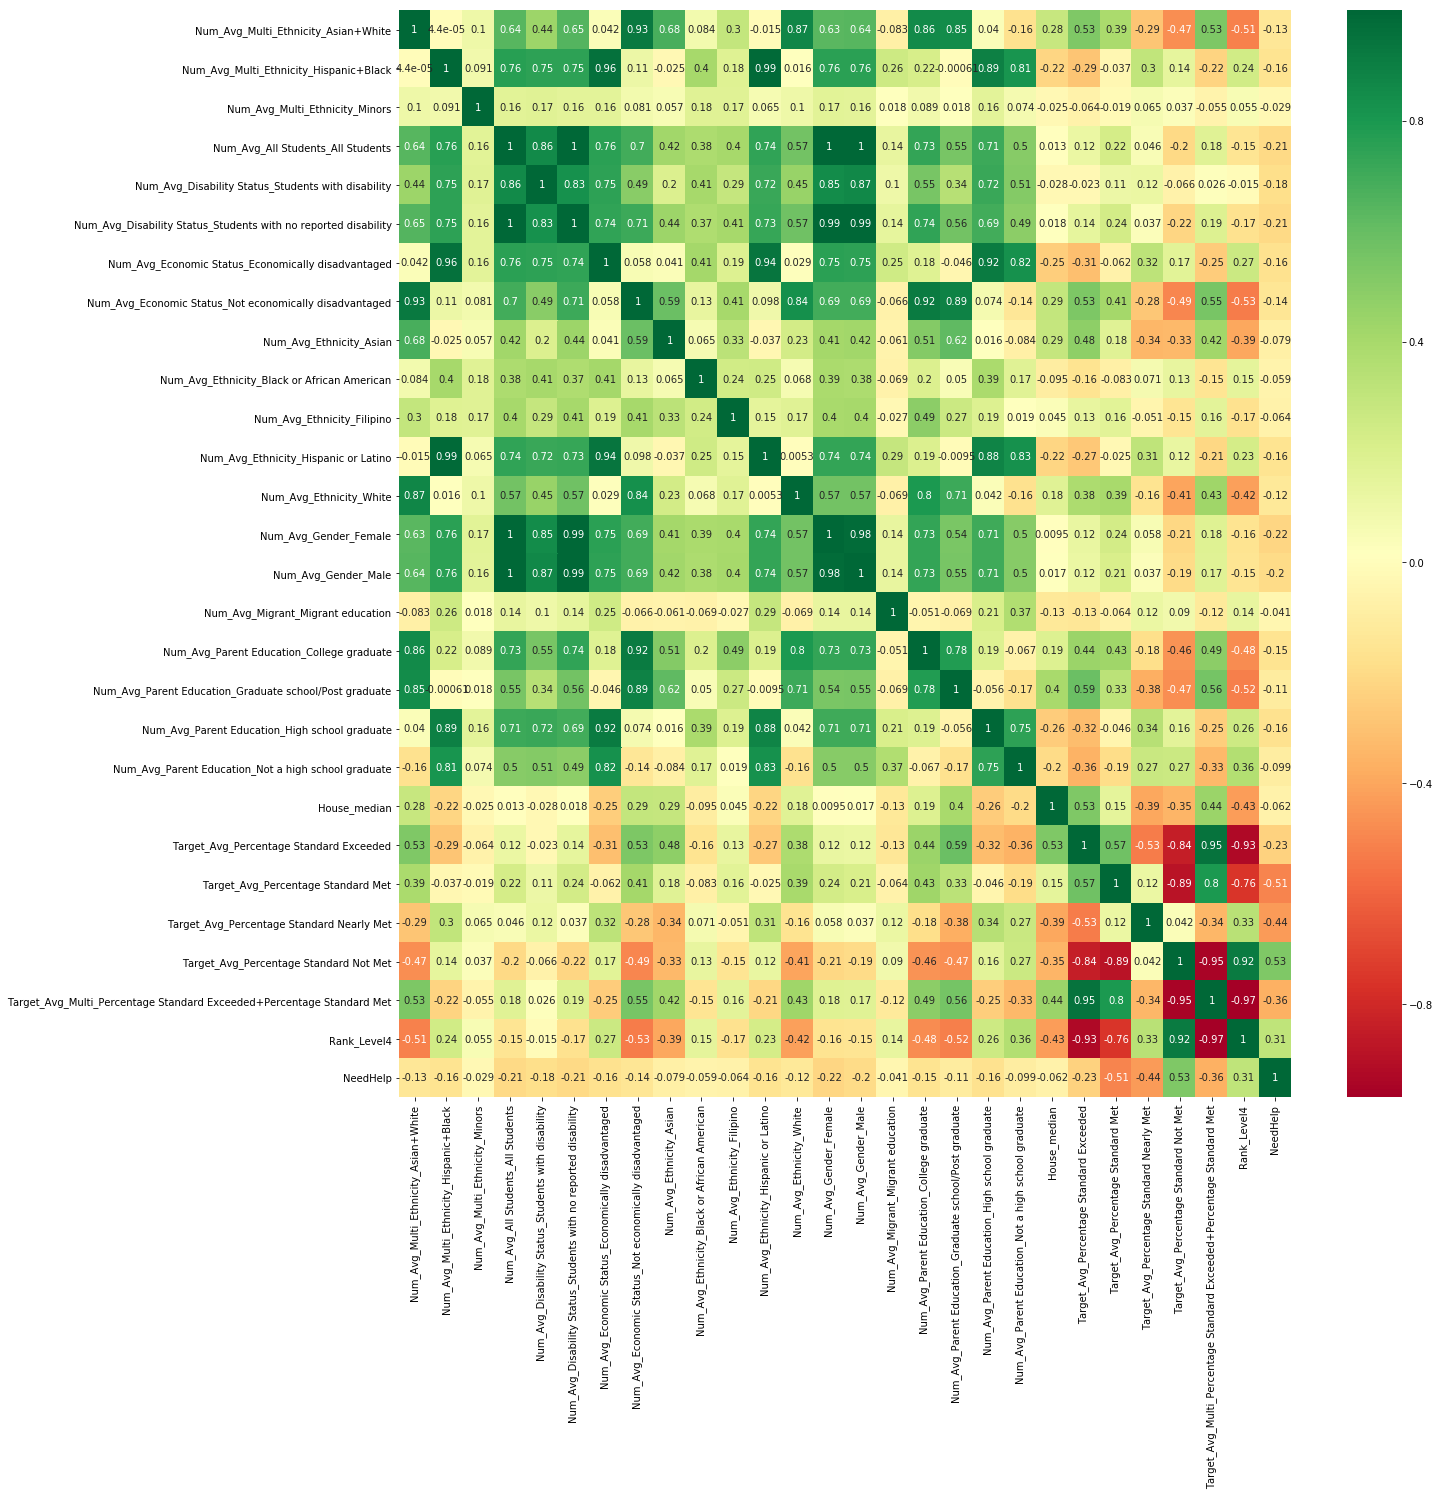

In [47]:
# top_corr_features = corr.index
corr = X_all_Num.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="RdYlGn")

**Correlation Table with Percent Related Features**

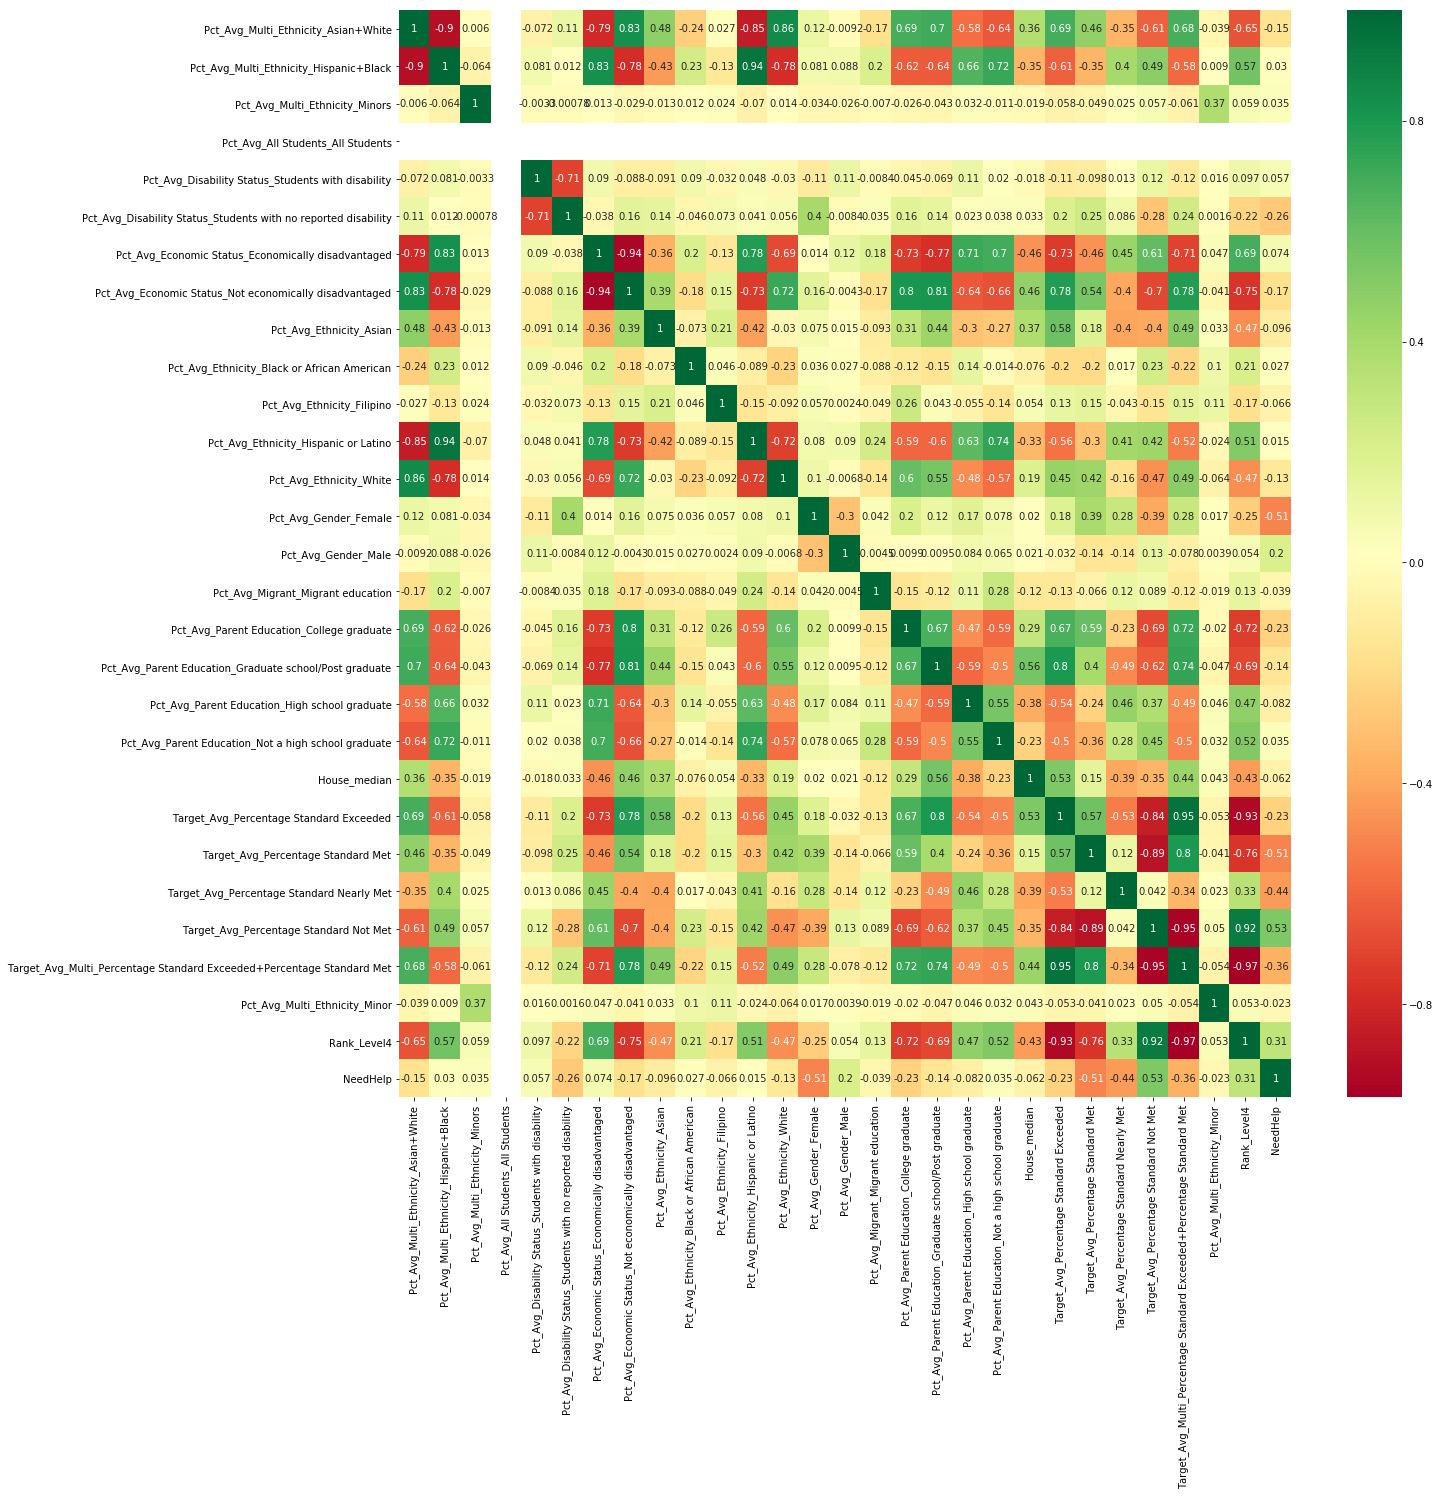

In [48]:
corr = X_all_Pct.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="RdYlGn")

==> With the results above, just as assumed, the high score (`Target_Avg_Percentage Standard Exceeded`) is correlated to higher house price (`House_median`), higher education (`Num_Avg_Parent Education_Graduate school/Post graduate`), and good economic status (`Num_Avg_Economic Status_Not economically disadvantaged`).  

It is interesting that the number of Hispanics (`Num_Avg_Ethinicity_Hispanic or Latino`) is highly correlated (**0.94**) with the number of eonomically disadvantaged students. The percent of Hispanics (`Pct_Avg_Ethinicity_Hispanic or Latino`) is correlated (**0.78**) but not as strong as the number feature.
In California, there is the largetst number of Hispanic students among other ethinicity students, and this can be the cause of the high correlation.

In [49]:
#Number of students in each ethnicity
df_ethnicity = df.groupby(["Category", "Student Groups"], as_index=False).count().round(2)
df_ethnicity = df_ethnicity.loc[(df_ethnicity["Category"] == "Ethnicity"), ["Category", "Student Groups", "School Code"]]
df_ethnicity

,Category,Student Groups,School Code
14,Ethnicity,American Indian or Alaska Native,276
15,Ethnicity,Asian,7667
16,Ethnicity,Black or African American,6945
17,Ethnicity,Filipino,3428
18,Ethnicity,Hispanic or Latino,16782
19,Ethnicity,Native Hawaiian or Pacific Islander,412
20,Ethnicity,Two or more races,6595
21,Ethnicity,White,12612


### 3.2.2 Pearson’s Correlation Coefficient

Pearson's correlation coefficient tests whether two samples have a linear relationship.

Assumptions:
- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation:
- $H_0$: The two samples are independent.
- $H_1$: There is a dependency between the samples.

Here we calculate Spearman’s Correlation Using SciPy, `scipy.stats.pearsonr(x, y)`.  
For example, we investigated the relationship bewteen 'Pct_Ethnicity_Asian_Mathematics' and 'Target_Percentage Standard Exceeded_Mathematics'.

In [50]:
corr, p_val = stats.pearsonr(df_schools['Pct_Ethnicity_Asian_Mathematics'], df_schools['Target_Percentage Standard Exceeded_Mathematics'])
print("* Spearman Rank Correlation between '{}' and '{}':\n corr: {:.10f}, p-value: {:.10f}".format('Pct_Ethnicity_Asian_Mathematics', 'Target_Percentage Standard Exceeded_Mathematics', corr, p_val))

* Spearman Rank Correlation between 'Pct_Ethnicity_Asian_Mathematics' and 'Target_Percentage Standard Exceeded_Mathematics':
 corr: 0.6111925793, p-value: 0.0000000000


==> We reject the null hypothesis $H_0$.  
The portion of Asian studnets and the higher scores in Mathematics is not independent but strongly correlated.

### 3.2.3 Spearman's Rank Correlation

Spearman's correlation measures the strength and direction of monotonic association between two variables. Spearman’s rank correlation is the Pearson’s correlation coefficient of the ranked version of the variables. We can define a funciton for calculating the spearman's rank correlation. 

Assumptions:
Observations in each sample are independent and identically distributed.
Observations in each sample can be ranked.

Interpretation:
- $H_0$: The two samples are independent.
- $H_1$: There is a dependency between the samples.

In [51]:
# Create a function that takes in x's and y's
def spearmans_rank_corr(xs, ys):
    
    # Calculate the rank of x's
    xranks = pd.Series(xs).rank()
    
    # Caclulate the ranking of the y's
    yranks = pd.Series(ys).rank()
    
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    return scipy.stats.pearsonr(xranks, yranks)

Here we calculate Spearman’s Correlation Using SciPy, `scipy.stats.spearmanr(x, y)`.  
For example, we investigated the relationship bewteen 'House_median' and 'Target_Avg_Percentage Standard Exceeded'.

In [52]:
corr, p_val = stats.spearmanr(df_schools['House_median'], df_schools['Target_Avg_Percentage Standard Exceeded'])
print("* Spearman Rank Correlation between '{}' and '{}':\n corr: {:.10f}, p-value: {:.10f}".format('House_median', 'Target_Avg_Percentage Standard Exceeded', corr, p_val))

* Spearman Rank Correlation between 'House_median' and 'Target_Avg_Percentage Standard Exceeded':
 corr: 0.4723283465, p-value: 0.0000000000


//todo 

==> The difference between English and Mathematics is not much different. Therefore, we use the "Averge" scores when building the prediction models.

====> We reject the null hypothesis $H_0$.  
The house prices and high scores is not independent but correlated.

Reference  

Feature Selection Techniques in Machine Learning with Python  
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Feature selection using statistical testing:
https://medium.com/@vadim_uvarov/feature-selection-using-statistical-testing-2d8e7b5e27b8


## 3.3 Feature Selection

* Univariate Selection  
* Feature Importance  

### 3.3.1. Univariate Selection  

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the [SelectKBest class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)  that can be used with a suite of different statistical tests to select a specific number of features.

We use the chi-squared (chi$^2$) statistical test for non-negative features to select 20 best features.

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  #naming the dataframe columns
print("{} largest scores and features:".format(15))
print(featureScores.nlargest(20, 'Score'))  #print 20 best features
KBestFeatures = featureScores.nlargest(20, 'Score')
KBestFeatures['Feature'].tolist()

15 largest scores and features:
                                              Feature         Score
40                                       House_median  1.008531e+09
46                                        Rank_Level4  1.280128e+07
10  Num_Avg_Economic Status_Not economically disad...  6.177143e+05
1                 Num_Avg_Multi_Ethnicity_Asian+White  5.454386e+05
20  Num_Avg_Parent Education_Graduate school/Post ...  4.767870e+05
11                            Num_Avg_Ethnicity_Asian  4.302524e+05
9   Num_Avg_Economic Status_Economically disadvant...  3.083580e+05
3              Num_Avg_Multi_Ethnicity_Hispanic+Black  2.871154e+05
15                            Num_Avg_Ethnicity_White  2.865715e+05
14               Num_Avg_Ethnicity_Hispanic or Latino  2.697181e+05
19          Num_Avg_Parent Education_College graduate  2.220204e+05
22  Num_Avg_Parent Education_Not a high school gra...  1.910344e+05
6                   Num_Avg_All Students_All Students  1.384018e+05
8   Num_Avg_Disa

['House_median',
 'Rank_Level4',
 'Num_Avg_Economic Status_Not economically disadvantaged',
 'Num_Avg_Multi_Ethnicity_Asian+White',
 'Num_Avg_Parent Education_Graduate school/Post graduate',
 'Num_Avg_Ethnicity_Asian',
 'Num_Avg_Economic Status_Economically disadvantaged',
 'Num_Avg_Multi_Ethnicity_Hispanic+Black',
 'Num_Avg_Ethnicity_White',
 'Num_Avg_Ethnicity_Hispanic or Latino',
 'Num_Avg_Parent Education_College graduate',
 'Num_Avg_Parent Education_Not a high school graduate',
 'Num_Avg_All Students_All Students',
 'Num_Avg_Disability Status_Students with no reported disability',
 'Pct_Avg_Economic Status_Not economically disadvantaged',
 'Pct_Avg_Parent Education_Graduate school/Post graduate',
 'Num_Avg_Parent Education_High school graduate',
 'Pct_Avg_Multi_Ethnicity_Asian+White',
 'Pct_Avg_Ethnicity_Asian',
 'Target_Avg_Percentage Standard Not Met']

==> As expected, for the higer achievment (`Percentage of Standard Exceeded`),  higher house prices, higher economic status, Asians and Whites in Ethnicity, and higher education.
`Rank_Level4` is derived from the `Percentage of Standard Exceeded`, so it must be strongly correlated.

### 3.3.2 Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.01859354 0.01685551 0.02051509 0.01849808 0.00248624 0.00247872
 0.01925799 0.01838479 0.01873725 0.01930424 0.01861935 0.01325943
 0.01355331 0.00823142 0.01863704 0.01687121 0.01943203 0.01905219
 0.00409668 0.01820947 0.015663   0.01865736 0.01619564 0.
 0.01921476 0.02117509 0.02153181 0.02135553 0.01414441 0.01352667
 0.00841201 0.02011836 0.01721446 0.02204476 0.02162713 0.00397328
 0.02109622 0.01773892 0.01953482 0.0165362  0.02134377 0.03618613
 0.03248584 0.04593288 0.06130257 0.00146249 0.16046195 0.00599036]


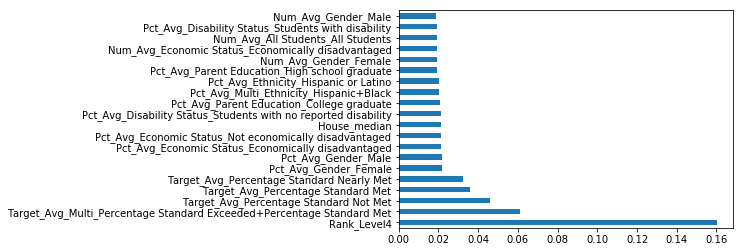

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

==> The `Rank_Level4` and the other score variables are identified as the important features.

==> Therefore, we identify the important features as below.

In [55]:
#Concatenation and remove duplicates
list1 = KBestFeatures['Feature'].tolist()
list2 = feat_importances.index.tolist()

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

#a = dict(Counter(list1+list2))
attr_important_features_inter = intersection(list1, list2)
attr_important_features_inter = list(set(attr_important_features_inter +attr_avg_score))

attr_important_features = list(set(list1+list2)) #len(attr_important_features): 31
attr_important_features

['Pct_Avg_Disability Status_Students with no reported disability',
 'Num_Avg_Ethnicity_Filipino',
 'Pct_Avg_Multi_Ethnicity_Minor',
 'Pct_Avg_Economic Status_Not economically disadvantaged',
 'Pct_Avg_Parent Education_Not a high school graduate',
 'Pct_Avg_Migrant_Migrant education',
 'Num_Avg_Ethnicity_Asian',
 'Target_Avg_Percentage Standard Met',
 'Target_Avg_Percentage Standard Not Met',
 'Target_Avg_Percentage Standard Nearly Met',
 'Num_Avg_All Students_All Students',
 'Pct_Avg_Parent Education_College graduate',
 'Pct_Avg_Economic Status_Economically disadvantaged',
 'Num_Avg_Ethnicity_Hispanic or Latino',
 'Num_Avg_Multi_Ethnicity_Hispanic+Black',
 'Num_Avg_Parent Education_High school graduate',
 'Num_Avg_Ethnicity_Black or African American',
 'Num_Avg_Migrant_Migrant education',
 'Pct_Avg_Ethnicity_Filipino',
 'Num_Avg_Parent Education_College graduate',
 'Pct_Avg_Multi_Ethnicity_Asian+White',
 'Rank_Level4',
 'Num_Avg_Parent Education_Not a high school graduate',
 'Num_Avg_E

## 3.4 Additional Exploratory Data Analysis

### Analysis on Specific Groups

In [56]:
df_Level1, idx_Level1 = getPerformedSchools(df_schools, "Target_Avg_Percentage Standard Not Met", '>', 80)

The number of schools that ['Target_Avg_Percentage Standard Not Met' > 80] is 312.


==> The achivement performance inferior groups is much large and extreme.   
Many of those schools have zero percent of 'Percentage of Standard Exceeded' students.

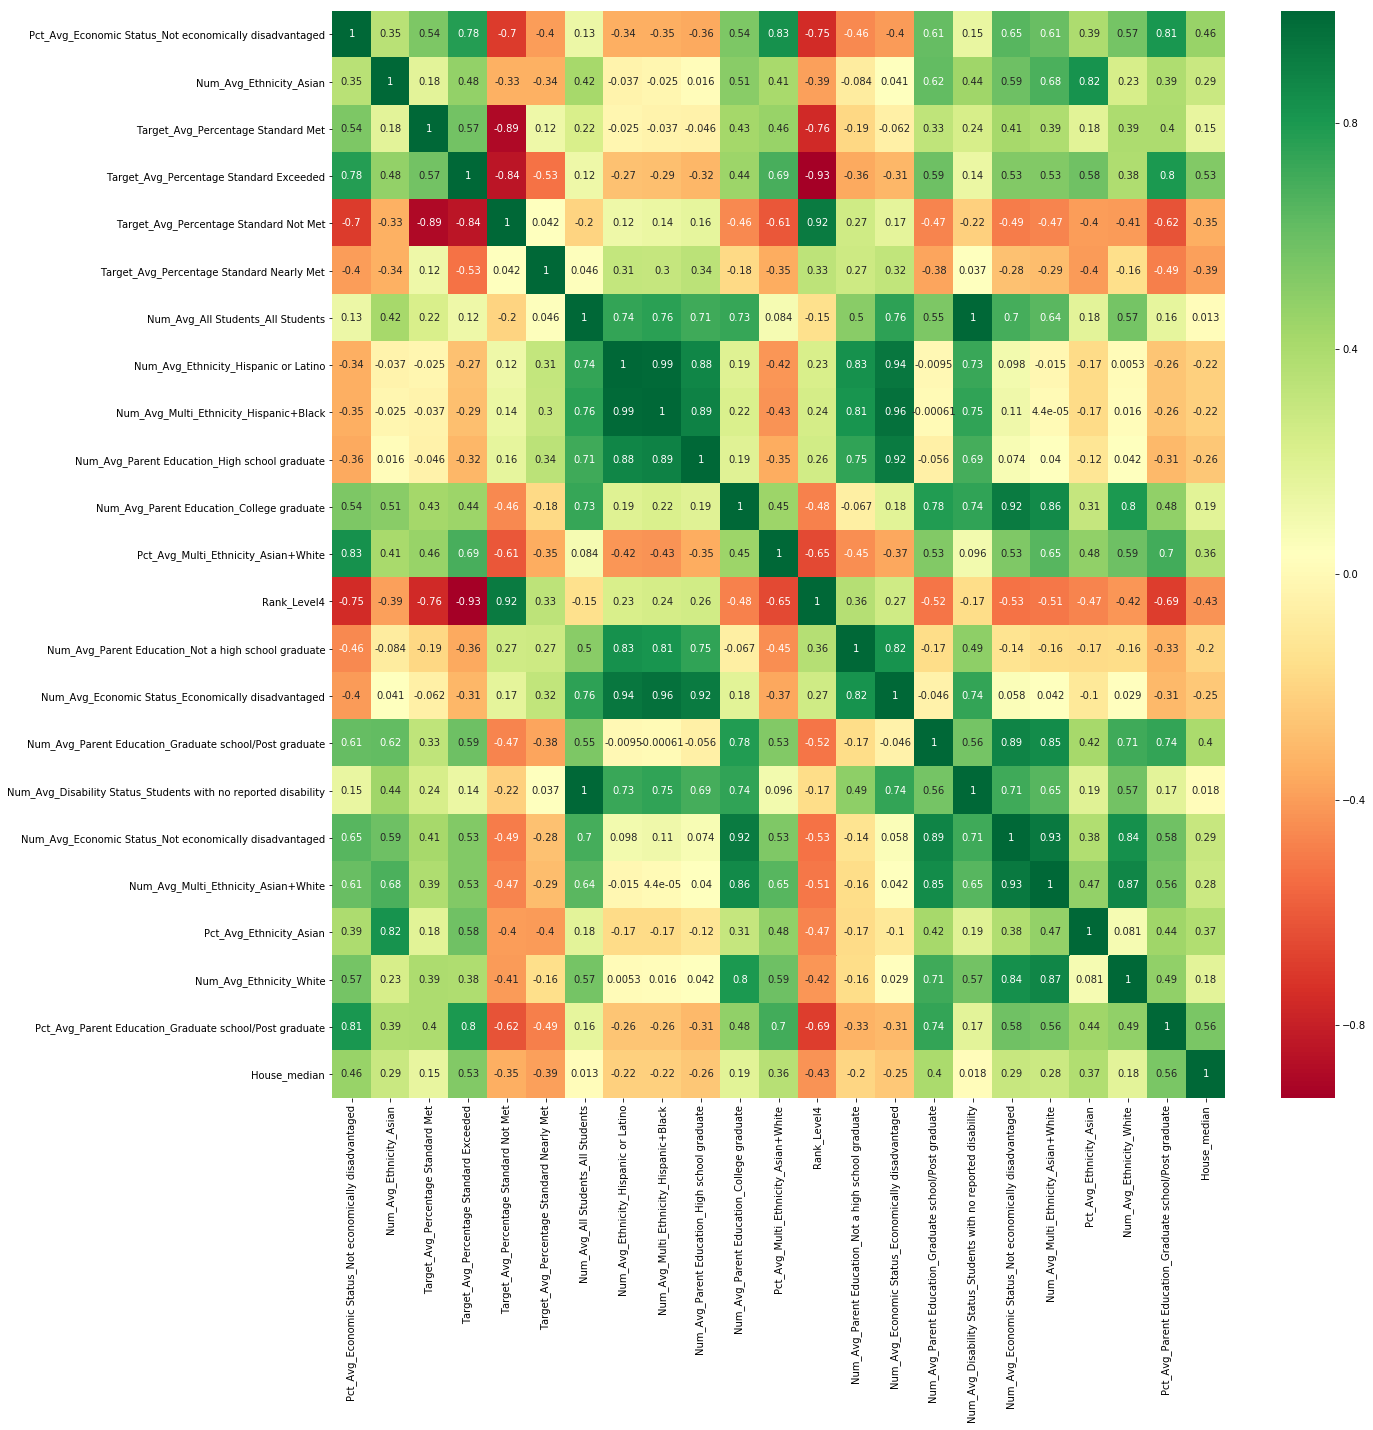

In [57]:
df_Level1 = df_Level1[attr_important_features_inter]
corr = df_Level1.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_schools[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
df_Level4, idx_Level4 = getPerformedSchools(df_schools, "Target_Avg_Percentage Standard Exceeded", '>', 80)

The number of schools that ['Target_Avg_Percentage Standard Exceeded' > 80] is 7.


==> Only seven schools have more than 80\% of Percentage Standard Met students in the average of both English and Mathematics.

### Visualization

**Race Percentage Distribution**

Ethnicity distribution the ``Percentage Standard Exceeded`` (Top-Tier Group)

In [59]:
def getDF(df, category, student_group):
    local_df = df.loc[(df['Category'] == category) & (df['Student Groups'] == student_group)]
    return local_df

df_asian = getDF(final_data, 'Ethnicity', 'Asian')
df_white = getDF(final_data, 'Ethnicity', 'White')
df_black = getDF(final_data, 'Ethnicity', 'Black or African American')
df_hispanic = getDF(final_data, 'Ethnicity', 'Hispanic or Latino')

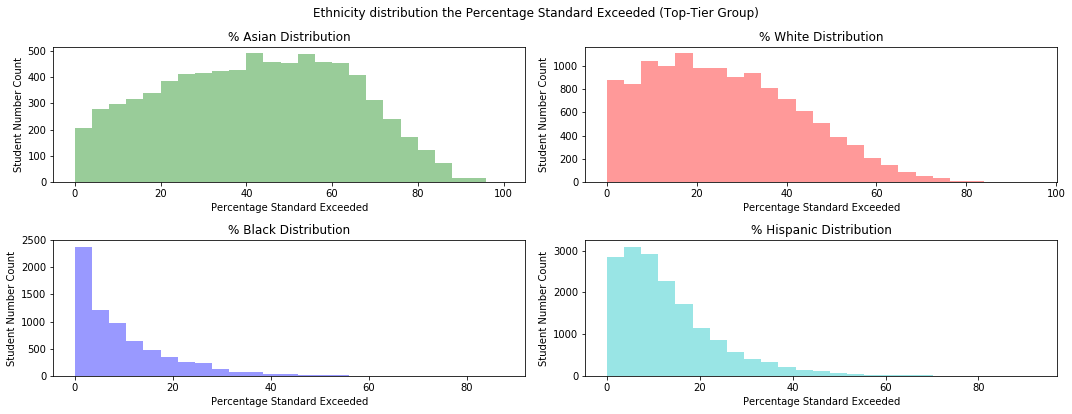

In [60]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
fig.suptitle('Ethnicity distribution the Percentage Standard Exceeded (Top-Tier Group)\n')

# Graph for Asian
sns.distplot(df_asian['Percentage Standard Exceeded'], kde=False, color="g", ax=axes[0,0], bins=25).set_title('% Asian Distribution')
axes[0,0].set_ylabel('Student Number Count')

# Graph for White
sns.distplot(df_white['Percentage Standard Exceeded'], kde=False, color="r", ax=axes[0,1], bins=25).set_title('% White Distribution')
axes[0,1].set_ylabel('Student Number Count')

# Graph for Black
sns.distplot(df_black['Percentage Standard Exceeded'], kde=False, color="b", ax=axes[1,0], bins=25).set_title('% Black Distribution')
axes[1,0].set_ylabel('Student Number Count')

# Graph for Hispanic
sns.distplot(df_hispanic['Percentage Standard Exceeded'], kde=False, color="c", ax=axes[1,1], bins=25).set_title('% Hispanic Distribution')
axes[1,1].set_ylabel('Student Number Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

==> Asian students are in the diverse range of the percentage of high scores. In short, many of the Asian students exceeded in some schools but a small portion of Asian students exceeded in other schools.

However, there are a few Black and Hispanic students who achieve the exceeded standard scores. As you can see, the graphs in the Black and Hispanic distribution, the grpah bar is skewed to the left. This means that a small portion of Black and Hispanic students exceeded some other schools, but there is almost no counts that the majority or a high portion of those Black and Hispanic students achieve the high performances.

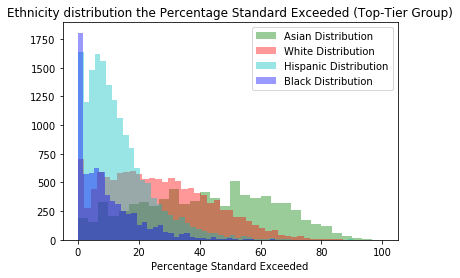

In [61]:
sns.distplot(df_asian['Percentage Standard Exceeded'], color="g", kde=False, label="Asian Distribution").set_title('Ethnicity distribution the Percentage Standard Exceeded (Top-Tier Group)')
sns.distplot(df_white['Percentage Standard Exceeded'], color="r", kde=False, label="White Distribution")
sns.distplot(df_hispanic['Percentage Standard Exceeded'], color="c", kde=False, label = "Hispanic Distribution")
sns.distplot(df_black['Percentage Standard Exceeded'], color="b", kde=False, label="Black Distribution")

plt.legend()
plt.show()

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Ethnicity distribution the `Percentage Standard Not Met` (Bottom-Tier Group)'

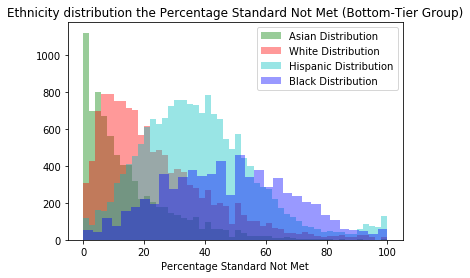

In [62]:
sns.distplot(df_asian['Percentage Standard Not Met'], color="g", kde=False, label="Asian Distribution").set_title('Ethnicity distribution the Percentage Standard Not Met (Bottom-Tier Group)')
sns.distplot(df_white['Percentage Standard Not Met'], color="r", kde=False, label="White Distribution")
sns.distplot(df_hispanic['Percentage Standard Not Met'], color="c", kde=False, label = "Hispanic Distribution")
sns.distplot(df_black['Percentage Standard Not Met'], color="b", kde=False, label="Black Distribution")

plt.legend()
plt.show()

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# TODO More (2019/5/22)


Machine learning
- 3 more models : RFR, GBR, SVR
- explanation
- latex report
- ppt

- Logistic regression/classification (0/1)

- Known facts conflicting group
    + ex) black >50 , house median: high 

# 4. Machine Learning Models

Reference

Predicting School Performance with Census Income Data
https://towardsdatascience.com/predicting-school-performance-with-census-income-data-ad3d8792ac97

## Supervised Learning

### Linear Regression

https://datatofish.com/statsmodels-linear-regression/

**Cross Validation**

We need to split the data into training and testing sets, fitted a regressin model to the training data, made predictions based on this data and tested the predictions on the test data. But the train/test split technique is not stable in that it may not split the data randomly and the data can be selected only from specific groups. This will result in overfitting.

Therefore, we the cross validations: K-Fold and Leave One Out Cross Validation (LOOCV).
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

* Train/Test Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6137, 48) (6137,)
(2631, 48) (2631,)


In [64]:
# for train_index, test_index in kfold.split(X):
#     print("TRAIN:", train_index, ", TEST:", test_index)
#     X_train, y_train = X[train_index], y[train_index]
#     X_test, y_test = X[test_index], y[test_index]

# model.fit(X_train, y_train)
# prediction = model.predict(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train, y_train)
print('Estimated intercept coefficient: {}'.format(model.intercept_))

Estimated intercept coefficient: -1.9173066194053092


In [66]:
print('Number of coefficients: {}'.format(len(model.coef_)))

Number of coefficients: 48


In [67]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': model.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Pct_Avg_Multi_Ethnicity_Asian+White,2.003783e-03
1,Num_Avg_Multi_Ethnicity_Asian+White,-6.537039e-03
2,Pct_Avg_Multi_Ethnicity_Hispanic+Black,-2.369755e-03
3,Num_Avg_Multi_Ethnicity_Hispanic+Black,-2.398666e-04
4,Pct_Avg_Multi_Ethnicity_Minors,9.391175e-05
5,Num_Avg_Multi_Ethnicity_Minors,-9.456777e-04
6,Num_Avg_All Students_All Students,-6.905572e-03
7,Num_Avg_Disability Status_Students with disabi...,1.116361e-03
8,Num_Avg_Disability Status_Students with no rep...,1.122117e-03
9,Num_Avg_Economic Status_Economically disadvant...,1.870462e-03


* K-Fold Cross Validation

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


seed = 7
n_splits = 3
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']
#'accuracy'

kfold =  KFold(n_splits=n_splits, random_state=seed) # Define the split - into 2 folds 

# for train_index, test_index in kfold.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

name = "Linear Regression"
cross_val = "K folds"
model = LinearRegression()
results =  cross_val_score(model, X, y, cv=kfold)
print("Model: {}, Cross Validation: {} {} {}{}".format(name, cross_val, "(K =", n_splits, ")"))
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Model: Linear Regression, Cross Validation: K folds (K = 3)
Accuracy: 99.964% (0.004%)


Text(0, 0.5, 'Predicted values')

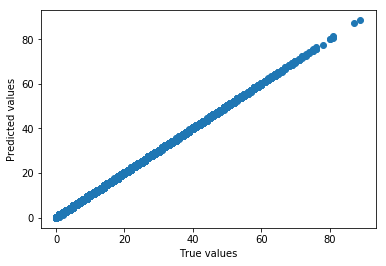

In [69]:
predictions = cross_val_predict(model, X, y, cv=kfold)
plt.scatter(y, predictions)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [70]:
pd.DataFrame({'target': y, 'predictions': predictions}).head() #8768 rows

,target,predictions
0,8.0,7.871513
1,50.0,49.600008
2,12.0,12.489565
3,22.0,21.603346
4,10.0,9.516245


In [71]:
from sklearn.metrics import r2_score

accuracy = r2_score(y, predictions)
print("Accuracy: {}".format(accuracy))

model_result = []
model_result.append((name, accuracy))
model_result

Accuracy: 0.9996573847658283


[('Linear Regression', 0.9996573847658283)]

* Leave One Out (LOO)

Please be cautious for getting a score of zero using cross val score when using the cross validation of Leave One Out.
https://stackoverflow.com/questions/50605956/getting-a-score-of-zero-using-cross-val-score

In [72]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
# loo.split(X)

name = "Linear Regression"
cross_val = "Leave One Out (LOO)"
model = LinearRegression()
scores = cross_validate(model, X, y, cv=loo, scoring=scoring)

print("Model: {}, Cross Validation: {}".format(name, cross_val))
rmse = (-1*mean(scores['test_neg_mean_squared_error']))**0.5
mae = -1*mean(scores['test_neg_mean_absolute_error'])
#accuracy = mean(scores['accuracy'])
print(f'RMSE: {rmse: 0.4f}, MAE: {mae: 0.4f}')
      #Accuracy: {accuracy: 0.4f}

Model: Linear Regression, Cross Validation: Leave One Out (LOO)
RMSE:  0.2823, MAE:  0.2404


Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

**sklearn vs. stats** 

In the above, we use the `scikit-learn` libraries. In `scikit-learn`, summary statistics must be done by hand. In contrast, computing summary statistics is done automatically in `statsmodels`.    

`statsmodels` has advantage of providing statistical summary (like t score, p-values) for all predictors and for intercept. The `scikit-learn` does not have this feature.  

The `scikit-learn` has advantage in terms of writing the equation. In `scikit-learn`, we just need to split the data to get features (X) and labels (y), and provide X and y as input. In short, `scikit-learn` pretty much just provides the the predicted values and the estimates of the regression coefficients.  
In case of `statsmodels`, we need to explicitly write the expression.

In [73]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import OLS

In [74]:
y_predicted = mean(y)
print("mean(y): {}".format(y_predicted))
rmse = (mean((y_predicted - y)**2))**0.5
mae = mean(abs(y_predicted - y))
print(f'RMSE: {rmse: 0.4f}, MAE: {mae: 0.4f}')

mean(y): 18.810447080291972
RMSE:  15.2869, MAE:  12.0635


In [75]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                       OLS Regression Results                                      
Dep. Variable:     Target_Avg_Percentage Standard Exceeded   R-squared:                       1.000
Model:                                                 OLS   Adj. R-squared:                  1.000
Method:                                      Least Squares   F-statistic:                 5.490e+05
Date:                                     Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                                             16:40:01   Log-Likelihood:                -1310.0
No. Observations:                                     8768   AIC:                             2716.
Df Residuals:                                         8720   BIC:                             3056.
Df Model:                                               47                                         
Covariance Type:                                 nonrobust                                         


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



**Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regression**

In [76]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# # from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR

# models = {
#  'RFR': RandomForestRegressor(n_estimators=50, random_state=0),
#  'GBR': GradientBoostingRegressor(max_depth=1, random_state=0),
#  #'LIR': LinearRegression(),
#  'SVR': SVR(kernel='linear')
# }

# scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']

# loo = LeaveOneOut.get_n_splits(X, y)
# for name, model in models.items():
#     scores = cross_validate(model, X, y, cv=loo,
#                             scoring=scoring)
#     rmse = (-1*mean(scores['test_neg_mean_squared_error']))**0.5
#     mae = -1*mean(scores['test_neg_mean_absolute_error'])
#     print(f'{name} RMSE: {rmse: 0.4f}, MAE: {mae: 0.4f}')
    
# Results
# RFR RMSE:  0.5301, MAE:  0.3253
# GBR RMSE:  2.2447, MAE:  1.6408

### Logistic Regression 
### Classification
https://stackoverflow.com/questions/37367405/python-scikit-learn-cant-handle-mix-of-multiclass-and-continuous

In [77]:
# from sklearn.metrics import accuracy_score #classification metric and cannot be used in regression
# print(accuracy_score(model.predict(X_test), y_test))

## Unsupervised Learning

### Clustering

In [78]:
### K-Nearest Neighbor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.



[0.16739606 0.15597345 0.15642458 0.1299435  0.15227273 0.14318442
 0.13148789 0.13504075 0.13427562 0.16627078]


### Evaluation Metrics

- accuracy
- AUC
- ROC
- precison, recall, F1 score

## Further Reference

### ANOVA

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. 
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/anova/

In [79]:
from scipy import stats

columns_to_analyze = []
for column in columns_to_analyze:
    grouped_dfs = []
    for group in df.groupby(column).groups:
        grouped_df = df.groupby(column).get_group(group)
        #reference below code
        grouped_df = grouped_df.reset_index()['Percentage Standard Exceeded']
        grouped_dfs.append(list(grouped_df.dropna()))
    F, p = stats.f_oneway(*grouped_dfs)
    print(f'{column}: {p: 0.2e}')

In [80]:
specific_grouped_df = df.groupby(["Category", "Student Groups"]).get_group(('Ethnicity','Asian'))
specific_grouped_df.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
116311,76,Asian,Ethnicity,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,38.46,23.08,23.08,15.38,13.0,38.46,38.46,23.08,38.46,53.85,7.69,30.77,61.54,7.69,0.00,0.00,0.00,696900
116312,76,Asian,Ethnicity,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,42.86,57.14,0.00,0.00,14.0,64.29,28.57,7.14,53.85,46.15,0.00,57.14,35.71,7.14,64.29,35.71,0.00,696900
116313,76,Asian,Ethnicity,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,Mathematics,7.27,16.36,41.82,34.55,55.0,9.09,45.45,45.45,14.55,50.91,34.55,5.45,60.00,34.55,0.00,0.00,0.00,696900
116314,76,Asian,Ethnicity,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,10.42,29.17,18.75,41.67,48.0,16.67,39.58,43.75,18.75,41.67,39.58,8.33,60.42,31.25,25.00,43.75,31.25,696900
116315,76,Asian,Ethnicity,1,61259,129635,2018,9,Alameda,Downtown Charter Academy,Downtown Charter Academy,94606,English,35.29,45.10,12.75,6.86,204.0,41.18,49.02,9.80,50.49,42.65,6.86,27.45,66.67,5.88,57.84,37.25,4.90,684400


In [81]:
#grouped_df.reset_index()
#reset_index(): Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
specific_grouped_df = specific_grouped_df.reset_index()['School Code']

specific_grouped_df.head()

0    3030772
1    3030772
2    6057095
3    6057095
4     129635
Name: School Code, dtype: int64

### Chi square testing

In [82]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


### Types of Statistical Data

NUMERICAL, CATEGORICAL, AND ORDINAL  

- Categorical : Ex) blonde, brown, brunette, red, etc.
- Ordinal : Similar to categories but has clear ordering (low, medium, high)
- Interval : If these categories were equally spaced, then the variable would be an interval variable.

https://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

https://www.statisticshowto.datasciencecentral.com/ranked-variable/

In [83]:
# # number of schools that has more than 70% of Asians and Whites
# print("The number of schools that has more than 70% of Asians and Whites:")
# df_ethnicity1.shape[0]

# # Set up the matplotlib figure
# f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

# # Graph for Asian
# sns.distplot(df_ethnicity1['Target_Avg_Percentage Standard Exceeded'], kde=False, color="g", ax=axes[0,0], bins=25).set_title('% Asian and White Distribution')
# axes[0,0].set_ylabel('Target_Avg_Percentage Standard Exceeded')

# # Graph for White
# sns.distplot(df_ethnicity1['House_median'], kde=False, color="r", ax=axes[1,0], bins=25).set_title('% House price Distribution')
# axes[1,0].set_ylabel('House price')